# Netflix Dataset Analysis

In this project, we performed Exploratory Data Analysis (EDA) on Netflix’s content dataset. We cleaned the data, handled missing values, and visualized key features such as content types, ratings, and release years to uncover patterns and insights about Netflix’s catalog.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset and displaying the first few rows.

In [5]:
df = pd.read_csv("netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Checking the structure of the dataset and identifying missing values.

In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Creating 'year_added' Feature  
Cleaned the 'date_added' column and extracted the year each title was added to Netflix.

In [9]:
df['date_added'] = df['date_added'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

## Missing Data Percentage

Calculates and displays the percentage of missing values in each column where missing data exists.

In [11]:
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
year_added     0.113546
dtype: float64


**Insight:**    
Since the director column has nearly 30% missing values, we decided to exclude it from the analysis to maintain data reliability.

## Imputation for Missing Values in 'cast' and 'country'

Replace missing values in the 'cast' and 'country' columns with the string 'Unknown' to avoid data loss during analysis.

In [13]:
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

## Content Type Distribution
This bar chart shows the distribution of content types on Netflix — distinguishing between Movies and TV Shows.

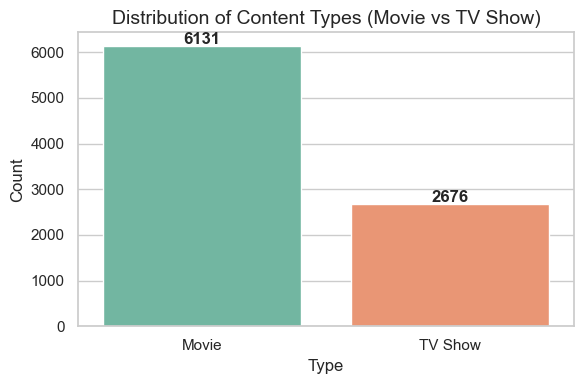

In [17]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, hue='type', palette='Set2', legend=False)
plt.title('Distribution of Content Types (Movie vs TV Show)', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

for index, value in enumerate(df['type'].value_counts()):
    plt.text(index, value + 50, str(value), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**    
Netflix’s content library is dominated by movies, likely because they are easier to produce and consume compared to multi-episode TV Shows.




## Distribution of Content Ratings on Netflix

Count of Netflix titles by rating, ordered by frequency with counts shown on bars.

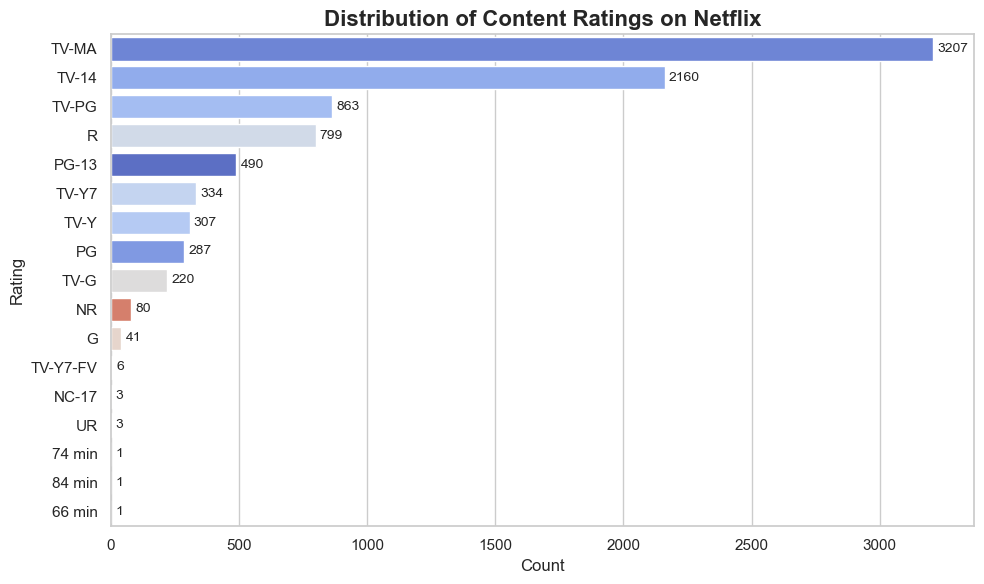

In [19]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

ax = sns.countplot(
    data=df,
    y='rating',
    hue='rating',
    dodge=False,
    order=df['rating'].value_counts().index,
    palette='coolwarm',
    legend=False
)

plt.title('Distribution of Content Ratings on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**    
The majority of Netflix content is rated TV-MA and TV-14, indicating a focus on mature and teenage audiences. There is also a significant amount of family-friendly content rated TV-PG, R, and PG-13, reflecting Netflix’s effort to cater to different age groups. However, content aimed at younger children (TV-Y, TV-Y7, G) is relatively limited, showing a smaller proportion of programming for that demographic.

## Content Release Trend by Year

This chart displays the distribution of content based on their original release year. It helps us observe how Netflix's catalog is composed over time and detect any notable trends or peaks in production.

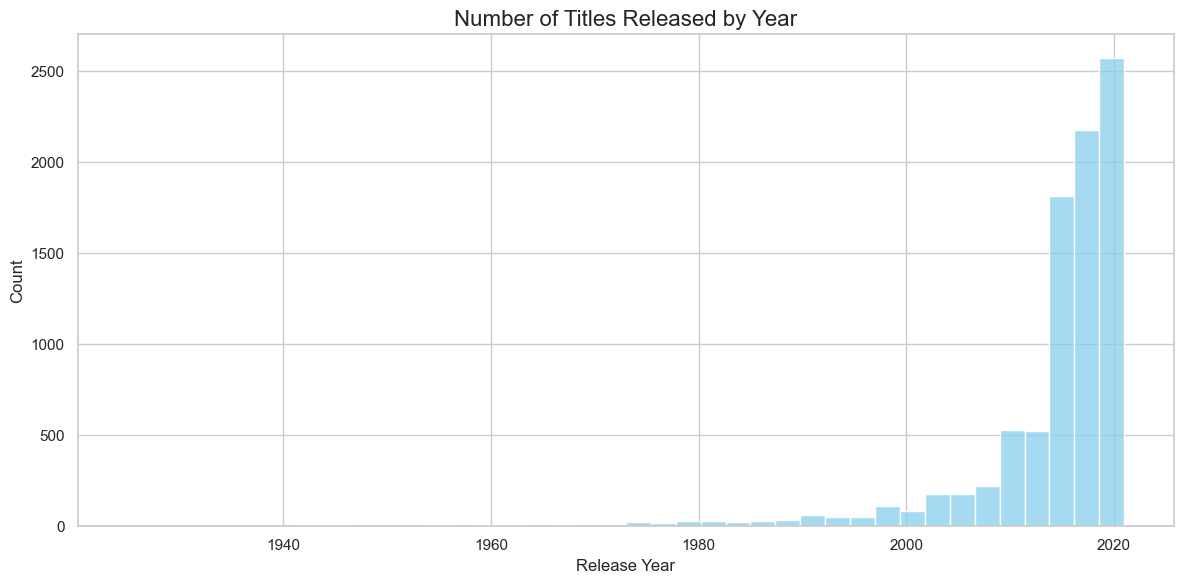

In [36]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='release_year', bins=40, color='skyblue')
plt.title('Number of Titles Released by Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insight:**  
The number of released titles shows a steady upward trend from the 1980s, with a sharp acceleration beginning in the mid-2000s. This aligns with the global shift toward digital content production and distribution, as well as Netflix’s expansion beyond the U.S. market. The peak in 2020 may be linked to Netflix’s aggressive push for original content in response to increasing competition in the streaming space.

## Top 10 Countries by Content Count

This chart shows which countries contribute the most titles to Netflix’s catalog. It helps highlight Netflix's dominant content regions and production sources.

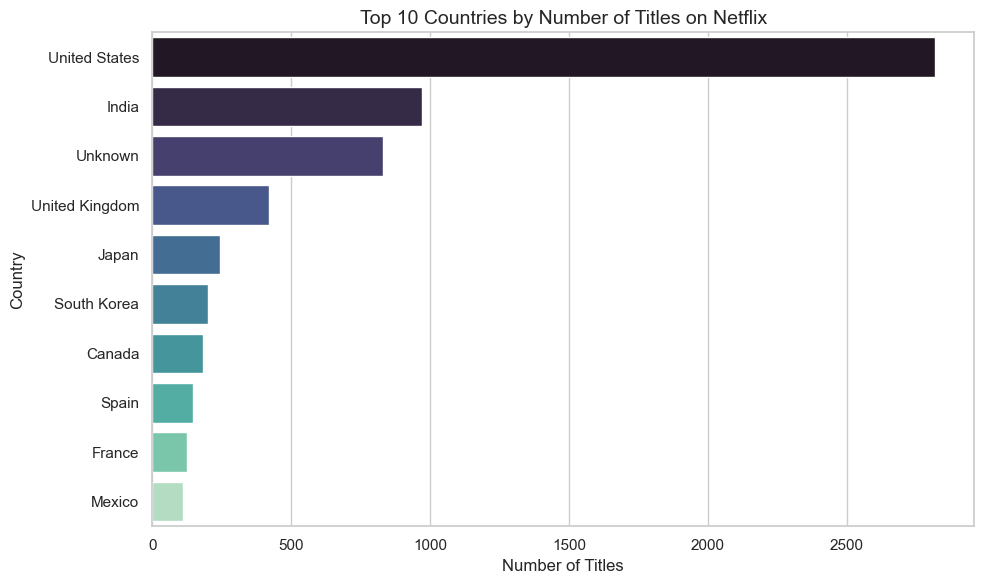

In [44]:
plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index, 
    dodge=False,
    palette='mako',
    legend=False  
)

plt.title('Top 10 Countries by Number of Titles on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Insight:**  
The United States dominates the Netflix catalog, contributing over 2,500 titles — a figure that significantly surpasses all other countries. This likely reflects both Netflix’s origin as a U.S.-based company and its strong partnerships with domestic studios. India, with around 1,000 titles, represents a key emerging market where Netflix has increasingly invested in local productions. A notable portion of content is labeled as “Unknown,” which may indicate data collection limitations or the prevalence of multinational co-productions that are difficult to assign to a single country. The presence of countries like the UK, Japan, and South Korea in the top 10 highlights Netflix’s strategy to diversify its content library through global partnerships, especially in high-demand regions.

## Distribution of Movie Durations

This chart shows how long movies typically are on Netflix. It helps us identify the most common length range for films on the platform.

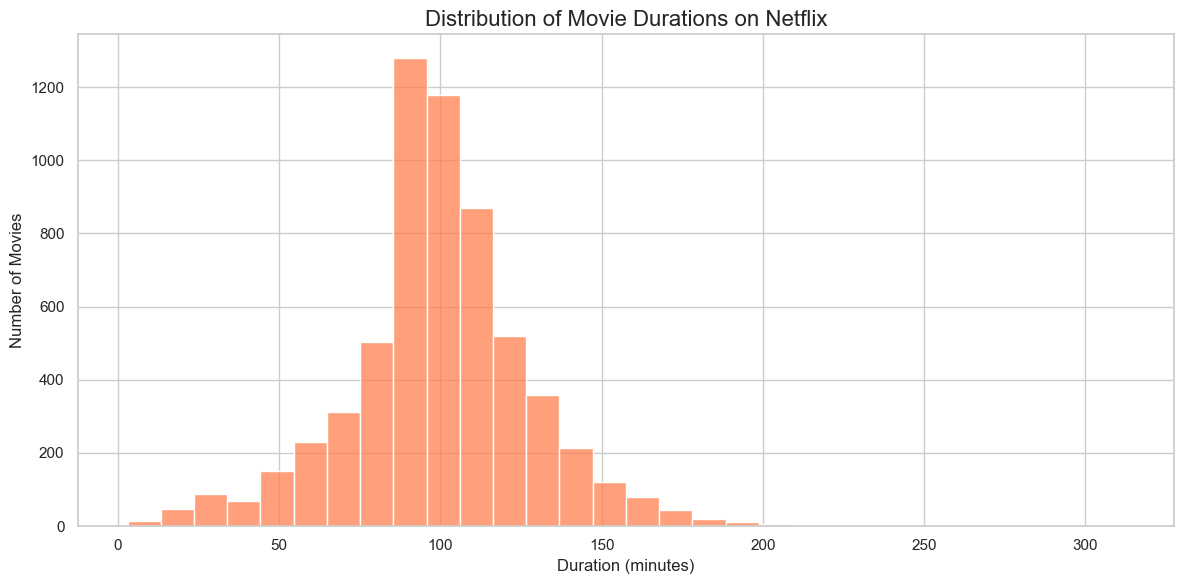

In [49]:
movies = df[df['type'] == 'Movie'].copy()

movies['duration_minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.histplot(data=movies, x='duration_minutes', bins=30, color='coral')
plt.title('Distribution of Movie Durations on Netflix', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**Insight:**  
Movie durations on Netflix are mostly concentrated between 70–120 minutes, suggesting that the platform may favor mid-length films to match viewer attention spans and consumption habits. The scarcity of very short or long films might reflect strategic content curation.

# Conclusion:
Through this exploratory data analysis of Netflix’s catalog, we uncovered key patterns in content type, release trends, regional contributions, and duration. The platform is clearly dominated by movies, with a significant portion of its content targeted at mature audiences. The sharp increase in content starting from the mid-2000s and peaking in 2020 reflects Netflix’s global expansion and its investment in original productions. The strong presence of countries like the U.S., India, and the U.K. highlights strategic content sourcing, while duration analysis indicates a preference for standard-length films. Overall, Netflix’s catalog showcases both regional diversity and a data-driven content strategy shaped by evolving viewer demands.